In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Obesity Classification.csv')
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [3]:
type(data)
data.shape

(108, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [5]:
# To identify null values
data.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [6]:
# Checking for duplicate records.
data.duplicated().sum()

0

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,108.0,56.046296,31.917939,1.0,28.75,56.5,83.25,110.0
Age,108.0,46.555556,24.720620,11.0,27.00,42.5,59.25,112.0
Height,108.0,166.574074,27.873615,120.0,140.00,175.0,190.00,210.0
Weight,108.0,59.490741,28.856233,10.0,35.00,55.0,85.00,120.0
BMI,108.0,20.549074,7.583818,3.9,16.70,21.2,26.10,37.2


In [8]:
data.drop('ID', axis = 1, inplace= True)
data.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese


Text(0.5, 1.0, 'Count of test subjects by Gender')

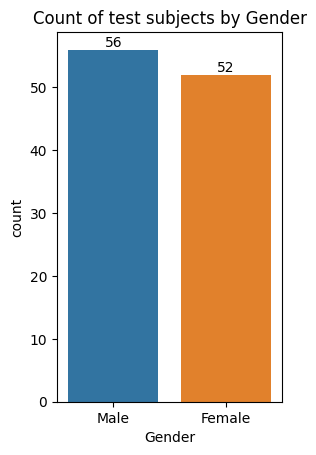

In [9]:
# Count of test subjects based on gender
plt.subplot(1, 2, 1)
ax=sns.countplot(x='Gender', data=data, hue="Gender")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of test subjects by Gender')

<ipython-input-11-6507d1d771e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=data,x='Label',palette='deep')


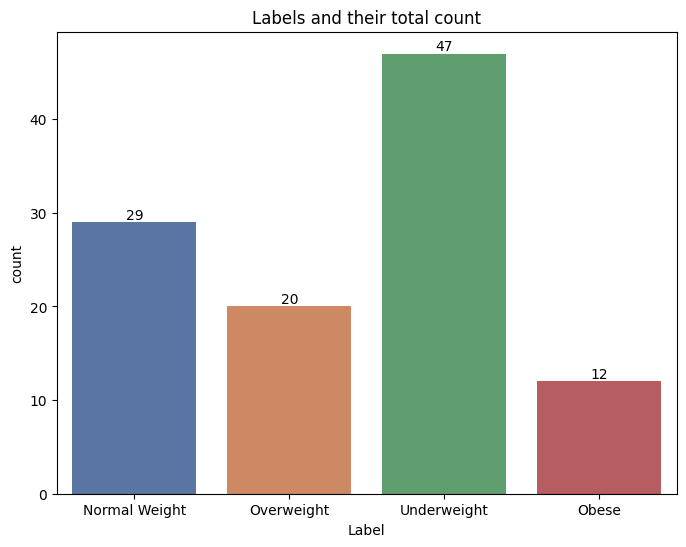

In [11]:
plt.figure(figsize=(8,6),dpi=100)
ax=sns.countplot(data=data,x='Label',palette='deep')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Labels and their total count');

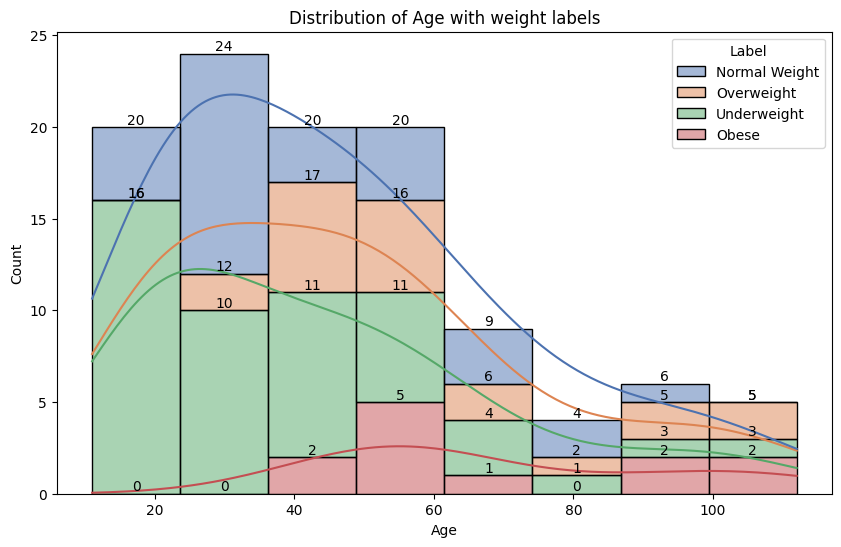

In [12]:
plt.figure(figsize=(10,6),dpi=100)
ax = sns.histplot(data=data,x='Age',kde=True,hue='Label',multiple='stack',palette='deep')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Age with weight labels');

Text(0.5, 1.0, 'Count of test subjects by Gender and their weight labels')

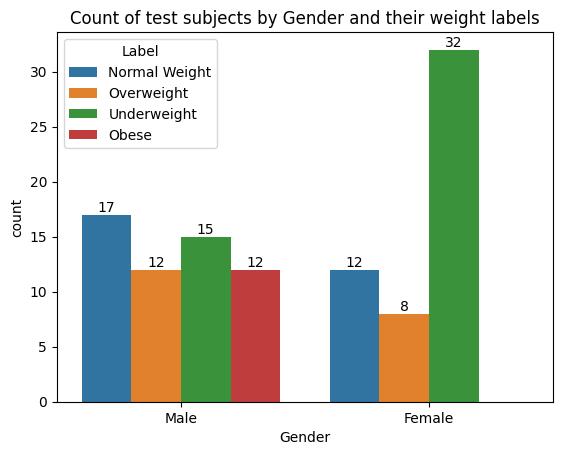

In [13]:
ax=sns.countplot(data =data , x = "Gender", hue ='Label')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of test subjects by Gender and their weight labels')

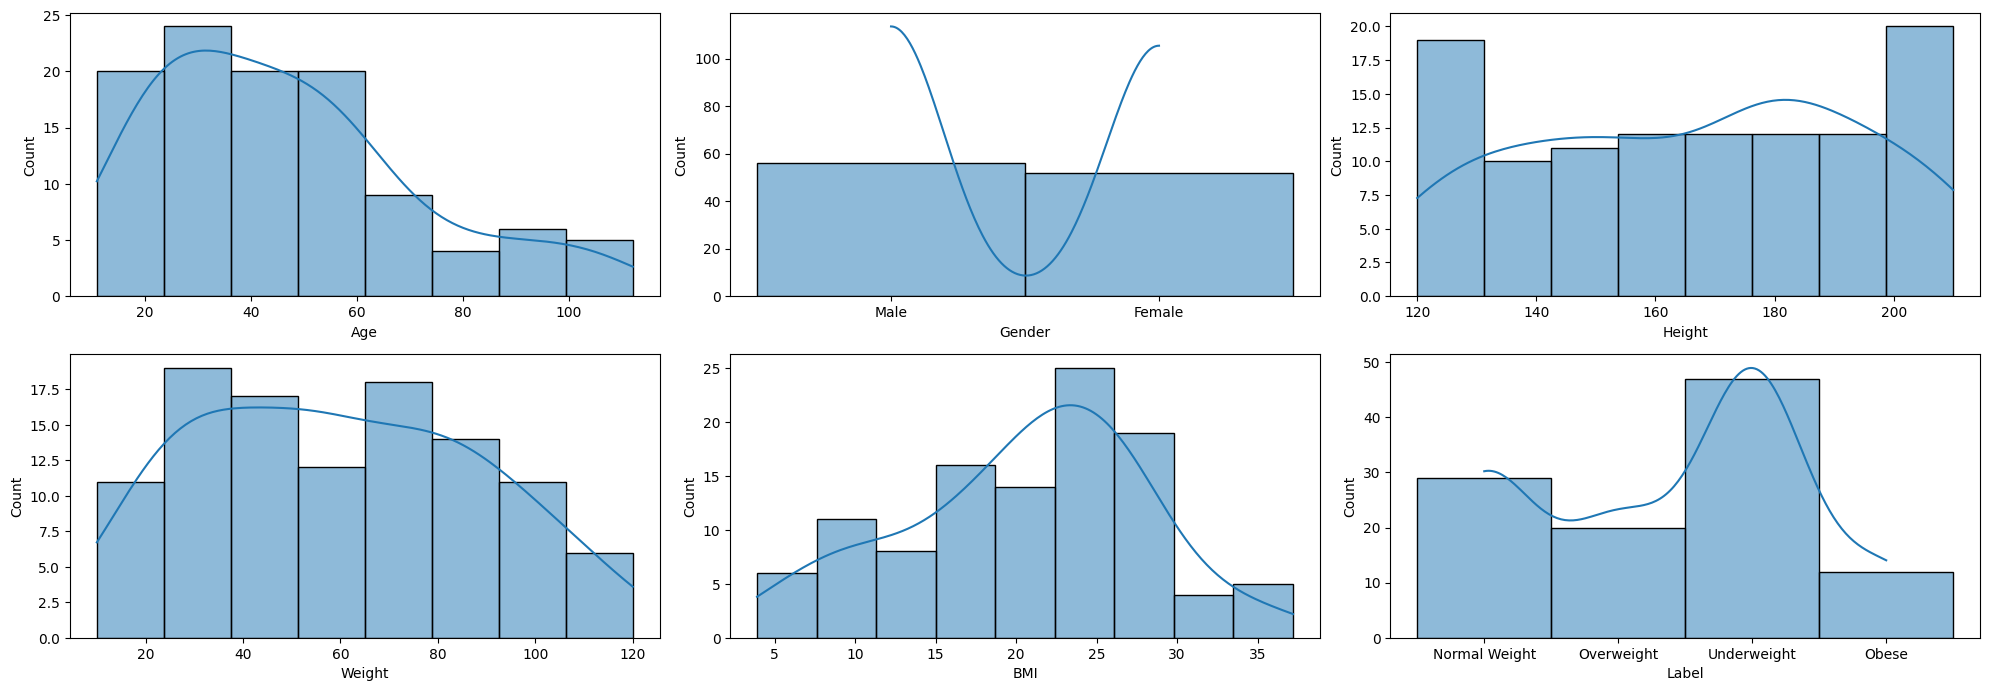

In [17]:
plt.figure(figsize=(20,10))
plotnumber=1
for column in data:
    plt.subplot(3,3,plotnumber)
    sns.histplot(x=data[column],kde=True)
    plotnumber+=1
plt.tight_layout()

In [19]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Label'] = label_encoder.fit_transform(data['Label'])

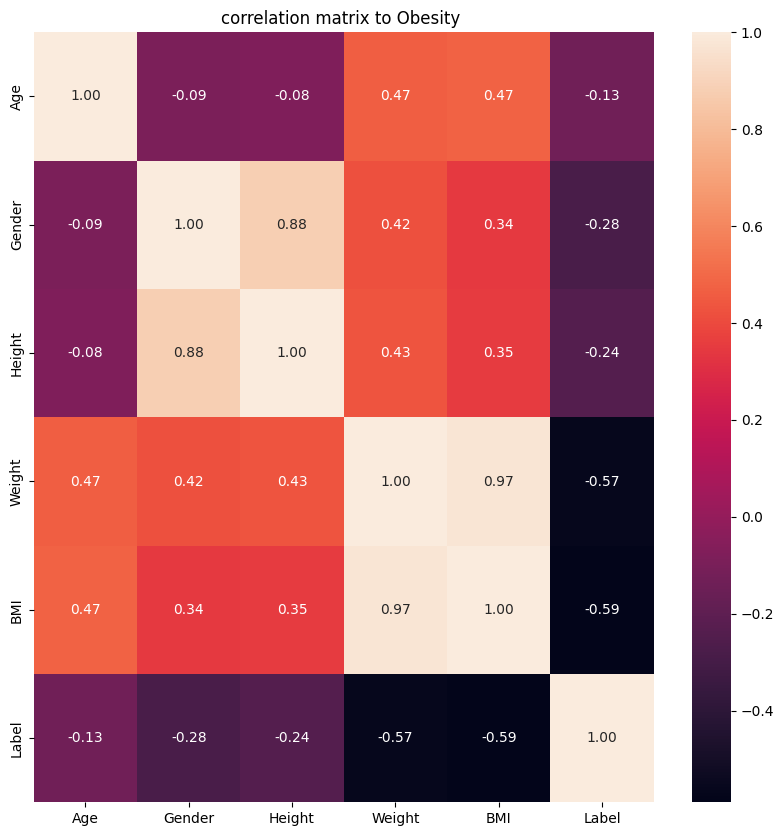

In [20]:
corrmatrix=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmatrix,annot=True,fmt="0.2f",color="Red")
plt.title("correlation matrix to Obesity ")
plt.show()

In [21]:
# Prepare the features and target
X = data[['Age', 'Height', 'Weight', 'BMI']]
y = data['Label']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Create and train the decision tree
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [24]:
# Calculate and print the accuracy
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


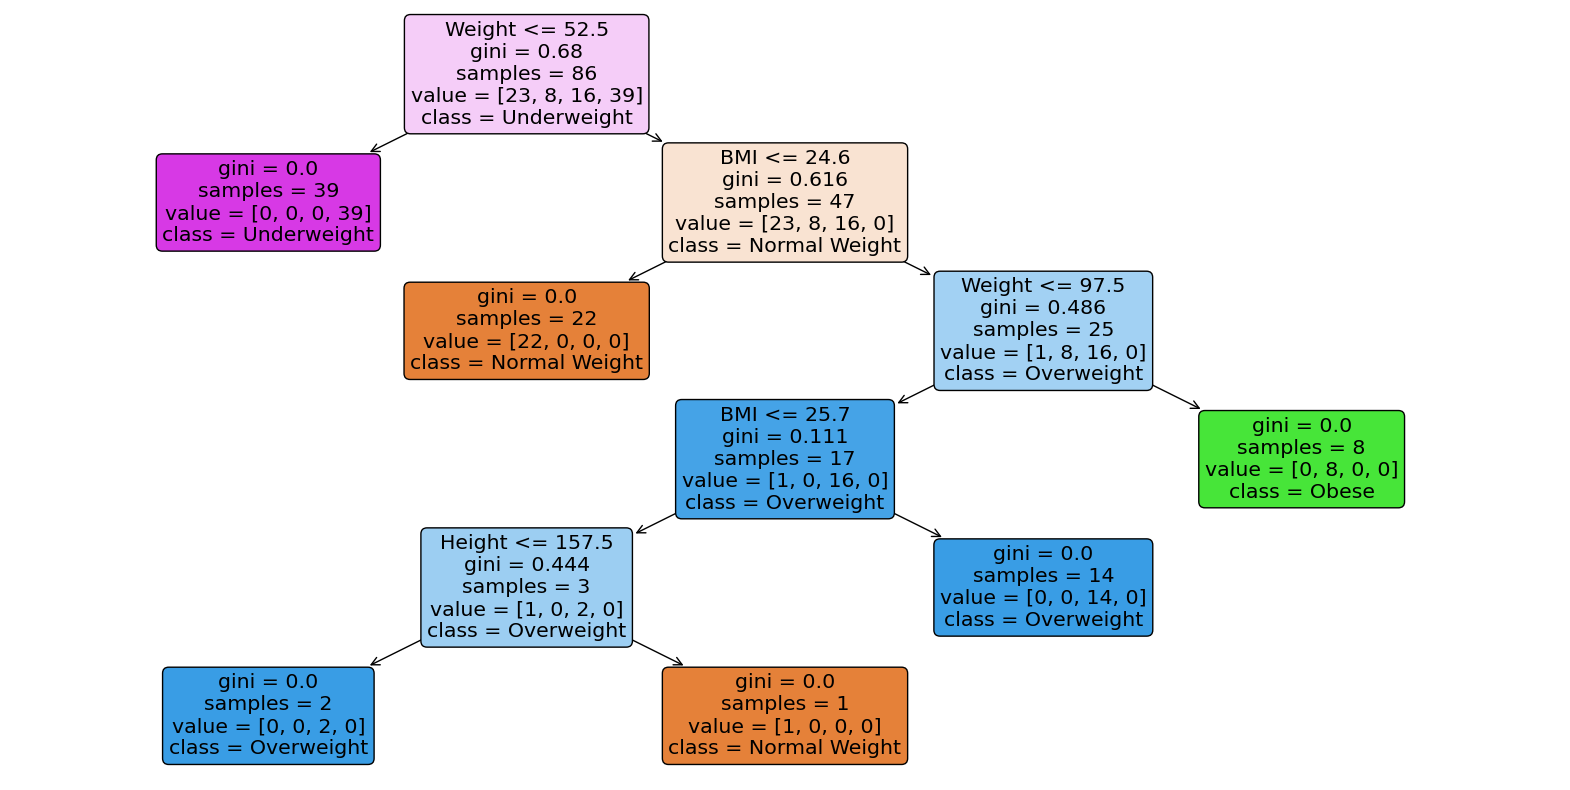

Age: 0.0000
Height: 0.0228
Weight: 0.6807
BMI: 0.2965


In [26]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.savefig('obesity_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

# Print feature importances
importances = clf.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")